In [42]:
import os;
os.listdir('/kaggle/input/')

['data-izzan']

In [43]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import seaborn as sns

In [44]:
dataset_izzan_1 = pd.read_csv('../input/data-izzan/data_train.csv')
dataset_izzan_2 = pd.read_csv('../input/data-izzan/data_test.csv')

In [45]:
dataset_izzan_1.head()

,original_text,source,pornografi,sara,radikalisme,pencemaran_nama_baik
0,[QUOTE=jessepinkman16;5a50ac34d89b093f368b456e...,kaskus,0,0,0,1
1,"@verosvante kita2 aja nitizen yang pada kepo,t...",instagram,0,0,0,0
2,"""#SidangAhok smg sipenista agama n ateknya mat...",twitter,0,1,1,1
3,@bolususulembang.jkt barusan baca undang2 ini....,instagram,0,0,0,0
4,bikin anak mulu lu nof \nkaga mikir apa kasian...,kaskus,0,0,0,0


In [46]:
dataset_izzan_2.head()

,original_text,source,pornografi,sara,radikalisme,pencemaran_nama_baik
0,"1.BUKAN CM SPANDUK PROF,VIDEO2 ORASI MEREKA, B...",twitter,0,0,1,0
1,@memeqbeceq gy sange'gatel yh tetek'memekY drn...,twitter,1,0,0,0
2,Pertama kali denger lagunya enk bgt in dan png...,instagram,0,0,0,0
3,"astajim, ini pasti yg kasih penghargaan ke ibu...",kaskus,0,0,0,0
4,beda kalo disini kalo komplain lgs di bully am...,kaskus,0,0,0,0


In [47]:
dataset = pd.concat([dataset_izzan_1, dataset_izzan_2], ignore_index=True)

In [48]:
dataset

,original_text,source,pornografi,sara,radikalisme,pencemaran_nama_baik
0,[QUOTE=jessepinkman16;5a50ac34d89b093f368b456e...,kaskus,0,0,0,1
1,"@verosvante kita2 aja nitizen yang pada kepo,t...",instagram,0,0,0,0
2,"""#SidangAhok smg sipenista agama n ateknya mat...",twitter,0,1,1,1
3,@bolususulembang.jkt barusan baca undang2 ini....,instagram,0,0,0,0
4,bikin anak mulu lu nof \nkaga mikir apa kasian...,kaskus,0,0,0,0
...,...,...,...,...,...,...
7768,"RT @KapalKertasFFI: Meski hanya Show Of Force,...",twitter,0,1,1,1
7769,"Da ky fpi u be, haha RT @jeffrey_stwn: hajar C...",twitter,0,1,1,1
7770,Manahan pantat isi nya lemak semua. Gua suuzon...,instagram,1,0,0,1
7771,"@uzman910 kw tebak sndri la,... kok cmna..biar...",instagram,0,0,0,0


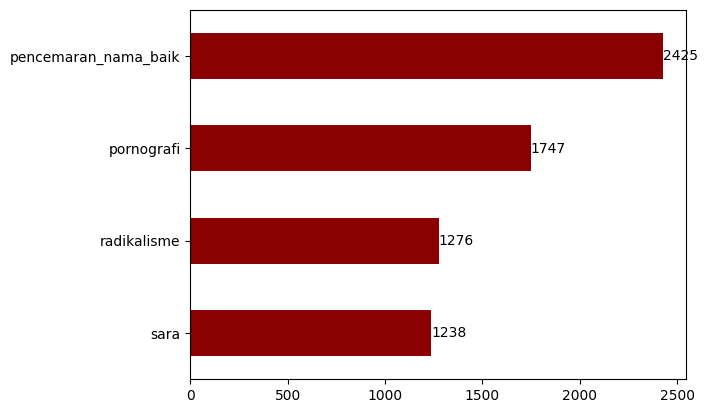

In [49]:
# Data frame Anda (df) dan operasi yang Anda lakukan
ax = (dataset[['pornografi', 'sara', 'radikalisme', 'pencemaran_nama_baik']]
      .sum(axis=0)
      .sort_values()
      .plot(kind='barh', color='darkred'))

# Menambahkan label ke setiap batang
for bar in ax.patches:
    width = bar.get_width()
    ax.annotate(f'{width}', xy=(width, bar.get_y() + bar.get_height() / 2), va='center')

plt.show()


In [50]:
dataset['labels'] = dataset[['pornografi', 'sara', 'radikalisme', 'pencemaran_nama_baik']].values.tolist()
dataset = dataset.drop(['pornografi', 'sara', 'radikalisme', 'pencemaran_nama_baik'], axis=1)
dataset


,original_text,source,labels
0,[QUOTE=jessepinkman16;5a50ac34d89b093f368b456e...,kaskus,"[0, 0, 0, 1]"
1,"@verosvante kita2 aja nitizen yang pada kepo,t...",instagram,"[0, 0, 0, 0]"
2,"""#SidangAhok smg sipenista agama n ateknya mat...",twitter,"[0, 1, 1, 1]"
3,@bolususulembang.jkt barusan baca undang2 ini....,instagram,"[0, 0, 0, 0]"
4,bikin anak mulu lu nof \nkaga mikir apa kasian...,kaskus,"[0, 0, 0, 0]"
...,...,...,...
7768,"RT @KapalKertasFFI: Meski hanya Show Of Force,...",twitter,"[0, 1, 1, 1]"
7769,"Da ky fpi u be, haha RT @jeffrey_stwn: hajar C...",twitter,"[0, 1, 1, 1]"
7770,Manahan pantat isi nya lemak semua. Gua suuzon...,instagram,"[1, 0, 0, 1]"
7771,"@uzman910 kw tebak sndri la,... kok cmna..biar...",instagram,"[0, 0, 0, 0]"


In [51]:
# df2 = dataset[['original_text', 'label']].copy()
# df2.columns = ['feature', 'label']
# df2

In [52]:
# print(dataset[['label']].value_counts())
# ax = (dataset[['label']].value_counts()
#       .plot(kind='pie', label="", autopct='%.1f', labels=["Positif (0)", "Negatif (1)"],
#             startangle=90, title="Proporsi Ungkapan Negatif dalam Dataset"))

# for t in ax.texts:
#     try:
#         float(t.get_text())
#         t.set_text(t.get_text() + "%")
#     except ValueError:
#         pass

In [53]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42)
print(train_data.columns)

Index(['original_text', 'source', 'labels'], dtype='object')


In [54]:
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense, SpatialDropout1D
from sklearn.preprocessing import MultiLabelBinarizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Assuming you have X_train, X_test, y_train, y_test, and other necessary variables

max_words = 5000
max_len = 100

# Tokenization and Padding
tokenizer = Tokenizer(num_words=max_words, split=' ')
tokenizer.fit_on_texts(dataset['original_text'])
X_seq = tokenizer.texts_to_sequences(dataset['original_text'])
X_pad = pad_sequences(X_seq, maxlen=max_len)

# MultiLabelBinarizer
mlb = MultiLabelBinarizer()
y_bin = mlb.fit_transform(dataset['labels'])

# Train-test split
X_train, X_test, y_train_bin, y_test_bin = train_test_split(X_pad, y_bin, test_size=0.2, random_state=42)

# Model Definition
model = Sequential()
model.add(Embedding(max_words, 128, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2, name = "LSTM_layer"))
num_classes = len(mlb.classes_)
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model Training
model.fit(X_train, y_train_bin, epochs=50, batch_size=32)

# Model Evaluation
loss, accuracy = model.evaluate(X_test, y_test_bin)
print("Loss:", loss)
print("Accuracy:", accuracy)


Epoch 1/50
195/195 [==============================] - 29s 132ms/step - loss: 0.3319 - accuracy: 0.9960
Epoch 2/50
195/195 [==============================] - 25s 129ms/step - loss: 0.1982 - accuracy: 0.9998
Epoch 3/50
195/195 [==============================] - 26s 131ms/step - loss: 0.1440 - accuracy: 0.9998
Epoch 4/50
195/195 [==============================] - 26s 131ms/step - loss: 0.1147 - accuracy: 0.9998
Epoch 5/50
195/195 [==============================] - 26s 131ms/step - loss: 0.0897 - accuracy: 0.9998
Epoch 6/50
195/195 [==============================] - 26s 132ms/step - loss: 0.0719 - accuracy: 0.9998
Epoch 7/50
195/195 [==============================] - 25s 130ms/step - loss: 0.0520 - accuracy: 0.9998
Epoch 8/50
195/195 [==============================] - 26s 133ms/step - loss: 0.0379 - accuracy: 0.9998
Epoch 9/50
195/195 [==============================] - 26s 133ms/step - loss: 0.0289 - accuracy: 0.9998
Epoch 10/50
195/195 [==============================] - 26s 132ms/step - l

In [64]:
print(X_test)

[[   0    0    0 ...  502  335  401]
 [   0    0    0 ...  721  804 2577]
 [   0    0    0 ...    2   39   44]
 ...
 [   0    0    0 ...    1 1203 3392]
 [   0    0    0 ...  340  333 3769]
 [   0    0    0 ... 2563  125   16]]


In [71]:
from keras.models import Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Mendapatkan representasi teks dari layer LSTM
lstm_layer_output = Model(inputs=model.input, outputs=model.get_layer('LSTM_layer').output)
X_train_lstm_representation = lstm_layer_output.predict(X_train)
X_test_lstm_representation = lstm_layer_output.predict(X_test)

# Penggabungan Representasi Teks dengan Fitur-Fitur Lain (jika diperlukan)
# Misalnya, X_train_non_text_features adalah array yang berisi fitur-fitur non-teks
# Pastikan untuk menyesuaikan fitur non-teks dengan dataset Anda
X_train_non_text_features = np.random.rand(X_train.shape[0], 2)  # Contoh: fitur non-teks acak
X_train_combined = np.hstack((X_train_lstm_representation, X_train_non_text_features))

# Membuat dan melatih model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_combined, y_train_bin)

# Penggabungan Representasi Teks dengan Fitur-Fitur Lain pada Data Uji
# Pastikan untuk menyesuaikan fitur non-teks dengan dataset Anda
X_test_non_text_features = np.random.rand(X_test.shape[0], 2)  # Contoh: fitur non-teks acak
X_test_combined = np.hstack((X_test_lstm_representation, X_test_non_text_features))

# Prediksi pada data uji menggunakan model Random Forest
y_test_rf_pred = rf_model.predict(X_test_combined)

# Evaluasi performa model Random Forest
accuracy_rf = accuracy_score(y_test_bin, y_test_rf_pred)
print("Random Forest Accuracy:", accuracy_rf)


49/49 [==============================] - 1s 22ms/step
Random Forest Accuracy: 0.772347266881029
